# Compare image quality after compression using basic SVD and SSVD algorithms

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

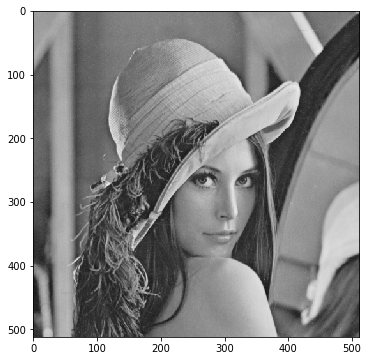

In [3]:
img = Image.open('Lenna.png')

imggray = img.convert('LA')
plt.figure(figsize=(12, 6))
plt.imshow(imggray)

In [4]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)

In [5]:
import sys
sys.path = ['..'] + sys.path

import svd_algo.svd as svd
import svd_algo.ssvd as ssvd
import svd_algo.compress_image as imgcomp

In [6]:
# Decompose the image using an ordinary algorithm

In [7]:
U_svd, sigma_svd, V_svd = svd.svd(np.array(imgmat))
V_svd = V_svd.T

../svd_algo/svd.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  sigma[i, i] = evalues[i] ** 0.5
../svd_algo/svd.py:60: ComplexWarning: Casting complex values to real discards the imaginary part
  UT[i] = np.dot(d, V[i])


In [8]:
# Decompose the image using an extended Shuffled SVD algorithm

In [9]:
X_16 = ssvd.svd_shuffle(np.array(imgmat, dtype='float64'), 16)
U_16, sigma_16, V_16 = svd.svd(X_16)
V_16 = V_16.T

X_8 = ssvd.svd_shuffle(np.array(imgmat, dtype='float64'), 8)
U_8, sigma_8, V_8 = svd.svd(X_8)
V_8 = V_8.T

../svd_algo/svd.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  sigma[i, i] = evalues[i] ** 0.5


In [10]:
ranks = [2, 5, 10, 15, 25, 50, 100]

# SVD

/home/andrew/anaconda3/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:219: ComplexWarning: Casting complex values to real discards the imaginary part
  return data.astype(dtype)


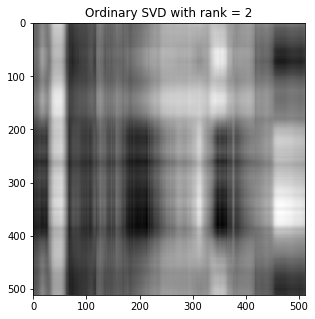

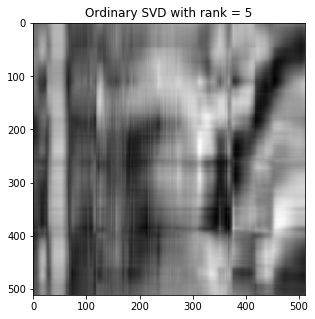

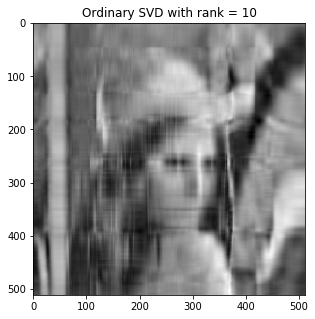

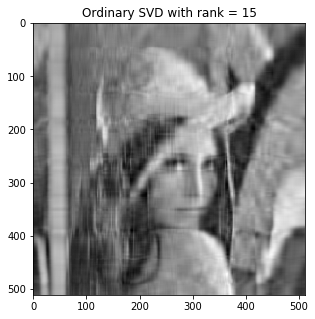

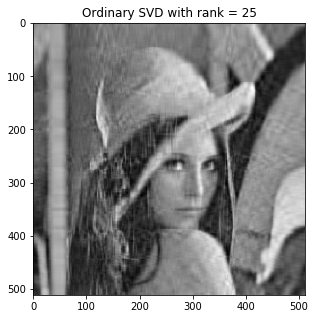

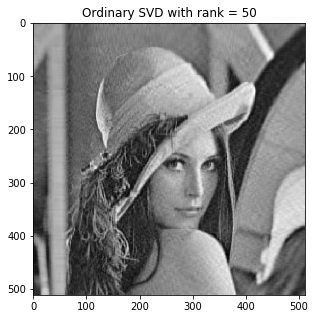

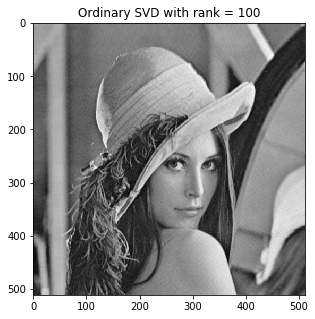

In [11]:
for r in ranks:
    img_svd = svd.get_A_approximation(U_svd, sigma_svd, V_svd, r)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(img_svd, cmap='gray');
    title = "Ordinary SVD with rank = {}".format(r)
    plt.title(title)
    plt.show()


# SSVD with block size 16

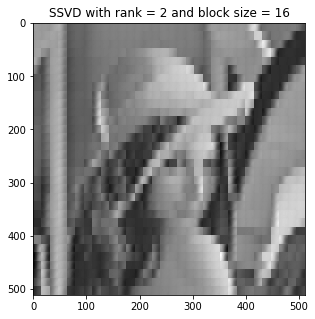

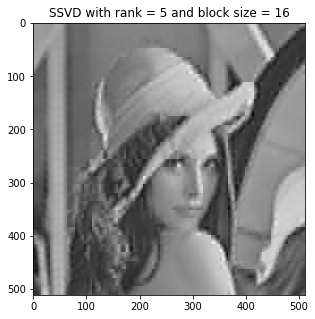

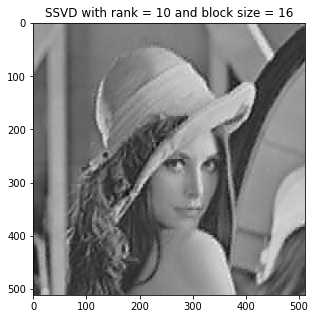

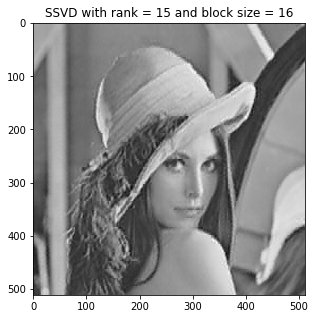

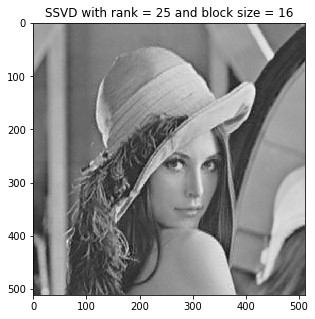

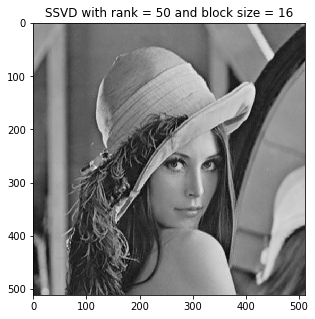

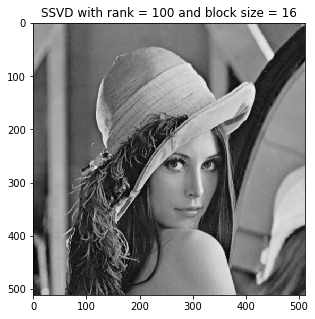

In [12]:
# SSVD_16

for r in ranks:
    # SSVD 16
    img_16 = svd.get_A_approximation(U_16, sigma_16, V_16, r)
    img_16 = ssvd.svd_unshuffle(img_16, imgmat.shape, 16)
    plt.figure(figsize=(10, 5))
    plt.imshow(img_16, cmap='gray');
    title = "SSVD with rank = {} and block size = {}".format(r, 16)
    plt.title(title)
    plt.show()

# SSVD with block size 8

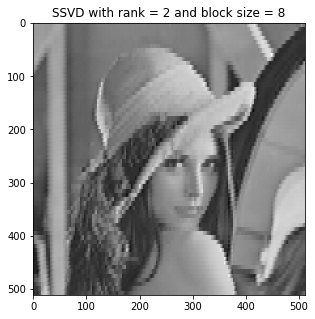

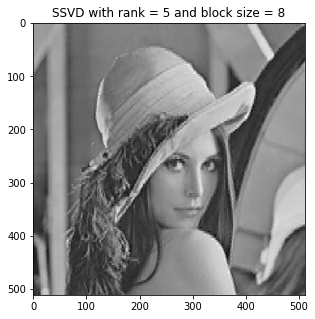

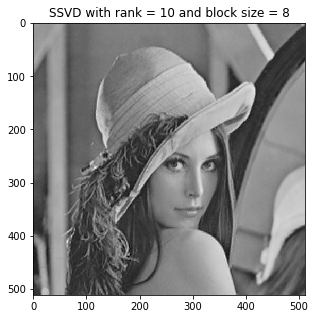

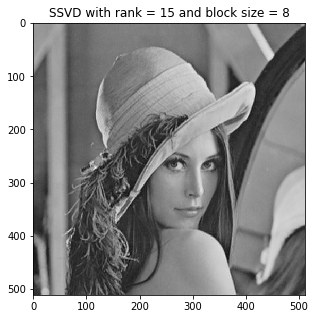

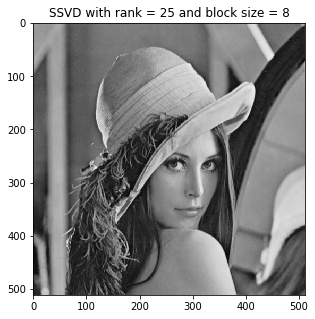

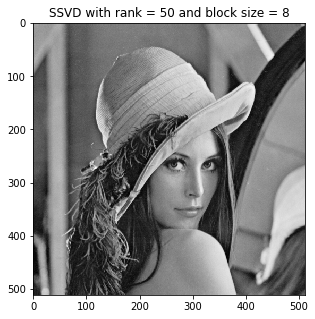

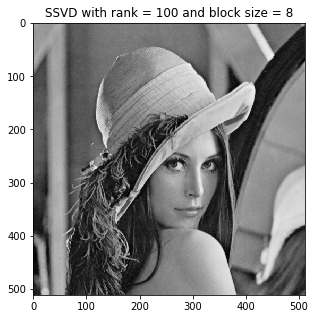

In [13]:
# SSVD 8

for r in ranks:
    img_8 = svd.get_A_approximation(U_8, sigma_8, V_8, r)
    img_8 = ssvd.svd_unshuffle(img_8, imgmat.shape, 8)
    plt.figure(figsize=(10, 5))
    plt.imshow(img_8, cmap='gray');
    title = "SSVD with rank = {} and block size = {}".format(r, 8)
    plt.title(title)
    plt.show()

# Compare image size after compression using basic SVD and SSVD algorithms

In [61]:
# Take one from svd, ssvd(8) and ssvd(16)

# BASIC SVD
r = 50

# img_svd = svd.get_A_approximation(U_svd, sigma_svd, V_svd, r)
# it transforms U_svd, sigma_svd, V_svd matrix in the next way
U_svd = np.matrix(U_svd[:, :r])
sigma_svd = sigma_svd[:r]
# sigma_svd = np.diag(sigma_svd[:r, :r])
V_svd = np.matrix(V_svd[:r, :])
img_svd_data = np.array([U_svd, sigma_svd, V_svd])


# SHUFFLED SVD WITH BLOCK_SIZE = 8
r = 5
# img_8 = svd.get_A_approximation(U_8, sigma_8, V_8, r)
# img_8 = ssvd.svd_unshuffle(img_8, imgmat.shape, 8)

U_8 = U_8[:, :r]
sigma_8 = sigma_8[:r]
# sigma_8 = np.diag(sigma_8[:r, :r])
V_8 = V_8[:r, :]
img_8_data = np.array([U_8, sigma_8, V_8])


# SHUFFLED SVD WITH BLOCK_SIZE = 16
r = 15
# img_16 = svd.get_A_approximation(U_16, sigma_16, V_16, r)
# img_16 = ssvd.svd_unshuffle(img_16, imgmat.shape, 16)
# img_16_data = np.array([U_16, sigma_16, V_16])

U_16 = np.matrix(U_16[:, :r])
sigma_16 = sigma_16[:r]
sigma_16 = sigma_16[:r, :r]
V_16 = np.matrix(V_16[:r, :])
img_16_data = np.array([U_16, sigma_16, V_16])


In [62]:
start_size = imgmat.shape[0] * imgmat.shape[1]
svd_size = U_svd.shape[0]*U_svd.shape[1] + sigma_svd.shape[0] + V_svd.shape[0]*V_svd.shape[1]
ssvd_8_size = U_8.shape[0]*U_8.shape[1] + sigma_8.shape[0] + V_8.shape[0]*V_8.shape[1]
ssvd_16_size = U_16.shape[0]*U_16.shape[1] + sigma_16.shape[0] + V_16.shape[0]*V_16.shape[1]

print("Size of original image: {}. It means that it has {} numbers(values)\n".format(imgmat.shape, start_size))

print("All next images quality is approximately equal\n\n")

print("BASIC SVD COMPRESSION. RANK = {}".format(50))
print("Size of basic SVD compressed image: {} + {} + {}.".format(U_svd.shape, sigma_svd.shape, V_svd.shape))
print("It means that it has {} numbers(values)".format(svd_size))
print("Compression rate: {}\n".format(start_size / svd_size))


print("SHUFFLED SVD COMPRESSION WITH BLOCK SIZE = {} AND RANK = {}".format(8, 5))
print("Size of basic SVD compressed image: {} + {} + {}.".format(U_8.shape, sigma_8.shape, V_8.shape))
print("It means that it has {} numbers(values)".format(ssvd_8_size))
print("Compression rate: {}\n".format(start_size / ssvd_8_size))


print("SHUFFLED SVD COMPRESSION WITH BLOCK SIZE = {} AND RANK = {}".format(16, 15))
print("Size of basic SVD compressed image: {} + {} + {}.".format(U_16.shape, sigma_16.shape, V_16.shape))
print("It means that it has {} numbers(values)".format(ssvd_16_size))
print("Compression rate: {}\n".format(start_size / ssvd_16_size))

print("Test saving...")    
np.save('img_svd_data.npy', img_svd_data)
np.save('img_8_data.npy', img_8_data)
np.save('img_16_data.npy', img_16_data)


Size of original image: (512, 512). It means that it has 262144 numbers(values)

All next images quality is approximately equal


BASIC SVD COMPRESSION. RANK = 50
Size of basic SVD compressed image: (512, 50) + (50,) + (50, 512).
It means that it has 51250 numbers(values)
Compression rate: 5.11500487804878

SHUFFLED SVD COMPRESSION WITH BLOCK SIZE = 8 AND RANK = 5
Size of basic SVD compressed image: (4096, 5) + (5,) + (5, 64).
It means that it has 20805 numbers(values)
Compression rate: 12.600048065368902

SHUFFLED SVD COMPRESSION WITH BLOCK SIZE = 16 AND RANK = 15
Size of basic SVD compressed image: (1024, 15) + (15, 15) + (15, 256).
It means that it has 19215 numbers(values)
Compression rate: 13.642674993494666

Test saving...
